# Dataset Exploration

Explore the dataset generated using ../src/build_dataset.py

In [1]:
import pickle
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
fnames = glob('../src/dataset/*.pkl')
len(fnames)

10001

In [3]:
fname = np.random.choice(fnames, 1)[0]
fname

'../src/dataset/85c7793f-1b7e-4181-9587-15e5547cc98d.pkl'

In [4]:
dataset = pickle.load(open(fname, 'rb'))

In [5]:
type(dataset)

list

In [3]:
def plot_frame(frame_info):
    obs, action, next_obs = frame_info
    img_obs = Image.fromarray(obs)
    img_next_obs = Image.fromarray(next_obs)
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img_obs)
    axs[1].imshow(img_next_obs)
    plt.axis('off')

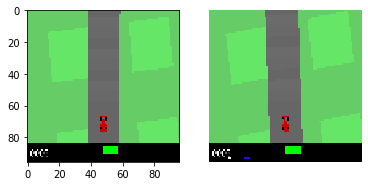

In [6]:
plot_frame(dataset[np.random.randint(0, len(dataset))])

In [6]:
from PIL import Image

In [16]:
size = 64, 64
im = Image.fromarray(dataset[0][0])
im.size

(96, 96)

In [17]:
im.thumbnail(size)

In [20]:
np.array(im).shape

(64, 64, 3)

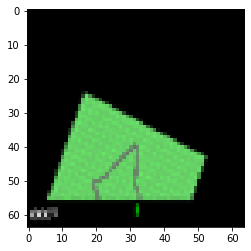

In [19]:
plt.imshow(im)

# NPZ File

The npz format is (s,a,s') => state,action,next_state.

In [2]:
# Sample test file
z_fname = '../src/processed_with_actions/50rollouts.npz'
with np.load(z_fname) as data:
    np_data = data['arr_0']

In [3]:
np_data.shape

(50000, 3)

In [4]:
type(np_data[0])

numpy.ndarray

In [5]:
print(type(np_data[0][0]), type(np_data[0][1]), type(np_data[0][2]))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
np_data[0].shape

(3,)

In [7]:
np_data[0][0].shape

(64, 64, 3)

In [8]:
np_data[0][1].shape

(3,)

In [9]:
np_data[0][2].shape

(64, 64, 3)

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

def load_resized_image(items):
    obs_img, action, next_obs_img = items    
    obs_img /= 255.
    next_obs_img /= 255.

    return obs_img, action, next_obs_img

def load_data(dirname, max_items=None):
    fnames = glob("{}/*.pkl".format(dirname))
    size = len(fnames) if not max_items else max_items
    fnames = np.random.choice(fnames, size)
    ds = tf.data.Dataset.from_tensor_slices(fnames)    
    dataset = ds.map(load_resized_image, num_parallel_calls=AUTOTUNE)
    items = dataset.take(1)
    print(items)

Tensorflow does not like the format of data, we need to try something different

In [24]:
ds = tf.data.Dataset.from_tensor_slices((np_data[0][0], np_data[0][1], np_data[0][2]))

ValueError: Dimensions 64 and 3 are not compatible

In [ ]:
dataset = ds.map(load_preprocess_image, num_parallel_calls=AUTOTUNE)

# Attempt 2

At this point, I modified convert_pickled_dataset_to_npz to hstack s,a,s'

In [2]:
z_fname = '../src/processed_with_actions/10rollouts.npz'
npzfile = np.load(z_fname)
npzfile.files

['arr_0', 'arr_1', 'arr_2']

In [3]:
with np.load(z_fname) as data:
    np_states = data['arr_0']
    np_next_states = data['arr_2']

In [4]:
np_states.shape

(10000, 64, 64, 3)

In [5]:
ds = tf.data.Dataset.from_tensor_slices(np_states)

In [6]:
ds.take(1)

<TakeDataset shapes: (64, 64, 3), types: tf.uint8>